##  Predictive Modeling with Python and TensorFlow

### Installing Packages

In [1]:
# Python version
from platform import python_version
print('Python version:', python_version())

Python version: 3.9.7


In [2]:
# Installing TensorFlow
!pip install -q tensorflow==2.5

In [3]:
!pip install -q graphviz

In [4]:
# Installing Pydot
!pip install -q pydot

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Loading Data

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Features:

* Number of Observations: 506
* The first 13 features are numerical/categorical predictive features.
* The last (attribute 14): the median value is the target variable.

In [7]:
# Data Download
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [8]:
# Column names
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [9]:
# Load Data
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [10]:
# Shape
dataset.shape

(506, 14)

In [11]:
# View Data
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Let's split the data into training and testing with an 80/20 ratio.

In [12]:
# Data Split
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Predictive Modeling - Simple Linear Regression

In simple linear regression we want to model the relationship between the dependent variable (y) and an independent variable (x).

* Independent variable: 'RM'
* Dependent variable: 'MEDV'

We want to predict the median value of owner-occupied homes based on the number of bedrooms.

Let's create a plot showing the current relationship between the variables.

Basically we have $MEDV=f(RM)$ and we want to estimate the function $f()$ using linear regression.

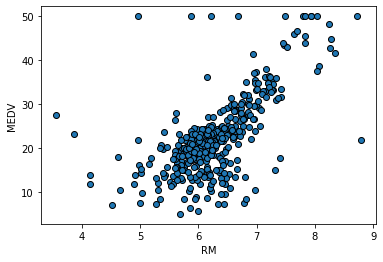

In [13]:
# Visual representation of training data
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Separating x and y.

In [14]:
# Division
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Model Creation

We want to find the parameters (**W**) that allow us to predict the output y from the input x:

$y = w_1 x + w_0$

This equation can be defined with the following dense layer in an artificial neural network model:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [15]:
# Building the model
def modelo_linear():
    
    # Creates the model
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compiling
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [16]:
# Creating the model
modelo = modelo_linear()

### Model Training

In [20]:
# Hyperparameters
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint saved every {} samples'.format(n_samples_save))

Checkpoint saved every 81000 samples


In [21]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [22]:
# List for forecasts
predictions_list = []

In [23]:
# Path to save checkpoint
checkpoint_path = "dados/"

In [24]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [25]:
# Save the first version of the model
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [26]:
# Training
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 0s 98ms/step - loss: 362.9009 - mae: 17.1172 - mse: 362.9009 - val_loss: 439.0691 - val_mae: 18.3601 - val_mse: 439.0691
Epoch 2/4000
2/2 [==============================] - 0s 13ms/step - loss: 357.7086 - mae: 16.9718 - mse: 357.7086 - val_loss: 433.6231 - val_mae: 18.2143 - val_mse: 433.6231
Epoch 3/4000
2/2 [==============================] - 0s 13ms/step - loss: 352.6716 - mae: 16.8266 - mse: 352.6716 - val_loss: 428.2157 - val_mae: 18.0684 - val_mse: 428.2157
Epoch 4/4000
2/2 [==============================] - 0s 12ms/step - loss: 347.6890 - mae: 16.6824 - mse: 347.6890 - val_loss: 422.8555 - val_mae: 17.9226 - val_mse: 422.8555
Epoch 5/4000
2/2 [==============================] - 0s 12ms/step - loss: 342.6656 - mae: 16.5375 - mse: 342.6656 - val_loss: 417.5464 - val_mae: 17.7771 - val_mse: 417.5464
Epoch 6/4000
2/2 [==============================] - 0s 11ms/step - loss: 337.8359 - mae: 16.3942 - mse: 337.8359 - val_loss: 412.2860 -

2/2 [==============================] - 0s 13ms/step - loss: 179.1375 - mae: 11.0488 - mse: 179.1375 - val_loss: 240.8718 - val_mae: 12.3825 - val_mse: 240.8718
Epoch 49/4000
2/2 [==============================] - 0s 12ms/step - loss: 176.4220 - mae: 10.9415 - mse: 176.4220 - val_loss: 237.8702 - val_mae: 12.2778 - val_mse: 237.8702
Epoch 50/4000
2/2 [==============================] - 0s 12ms/step - loss: 173.7879 - mae: 10.8346 - mse: 173.7879 - val_loss: 234.9133 - val_mae: 12.1775 - val_mse: 234.9133
Epoch 51/4000
2/2 [==============================] - 0s 14ms/step - loss: 171.0959 - mae: 10.7287 - mse: 171.0959 - val_loss: 232.0117 - val_mae: 12.0802 - val_mse: 232.0117
Epoch 52/4000
2/2 [==============================] - 0s 13ms/step - loss: 168.5132 - mae: 10.6220 - mse: 168.5132 - val_loss: 229.1474 - val_mae: 11.9832 - val_mse: 229.1474
Epoch 53/4000
2/2 [==============================] - 0s 12ms/step - loss: 165.9742 - mae: 10.5196 - mse: 165.9742 - val_loss: 226.3245 - val_mae

2/2 [==============================] - 0s 13ms/step - loss: 91.3371 - mae: 7.2149 - mse: 91.3371 - val_loss: 141.6640 - val_mae: 8.6945 - val_mse: 141.6640
Epoch 96/4000
2/2 [==============================] - 0s 14ms/step - loss: 90.1965 - mae: 7.1589 - mse: 90.1965 - val_loss: 140.3341 - val_mae: 8.6413 - val_mse: 140.3341
Epoch 97/4000
2/2 [==============================] - 0s 14ms/step - loss: 89.0875 - mae: 7.1031 - mse: 89.0875 - val_loss: 139.0270 - val_mae: 8.5883 - val_mse: 139.0270
Epoch 98/4000
2/2 [==============================] - 0s 14ms/step - loss: 88.0438 - mae: 7.0493 - mse: 88.0438 - val_loss: 137.7417 - val_mae: 8.5356 - val_mse: 137.7417
Epoch 99/4000
2/2 [==============================] - 0s 13ms/step - loss: 86.9885 - mae: 6.9966 - mse: 86.9885 - val_loss: 136.4893 - val_mae: 8.4834 - val_mse: 136.4893
Epoch 100/4000
2/2 [==============================] - 0s 13ms/step - loss: 85.9370 - mae: 6.9427 - mse: 85.9370 - val_loss: 135.2652 - val_mae: 8.4333 - val_mse: 13

2/2 [==============================] - 0s 14ms/step - loss: 60.4603 - mae: 5.4806 - mse: 60.4603 - val_loss: 102.6755 - val_mae: 7.0840 - val_mse: 102.6755
Epoch 144/4000
2/2 [==============================] - 0s 13ms/step - loss: 60.2109 - mae: 5.4655 - mse: 60.2109 - val_loss: 102.2792 - val_mae: 7.0671 - val_mse: 102.2792
Epoch 145/4000
2/2 [==============================] - 0s 14ms/step - loss: 59.9582 - mae: 5.4517 - mse: 59.9582 - val_loss: 101.8917 - val_mae: 7.0504 - val_mse: 101.8917
Epoch 146/4000
2/2 [==============================] - 0s 14ms/step - loss: 59.6791 - mae: 5.4360 - mse: 59.6791 - val_loss: 101.5135 - val_mae: 7.0338 - val_mse: 101.5135
Epoch 147/4000
2/2 [==============================] - 0s 13ms/step - loss: 59.4564 - mae: 5.4228 - mse: 59.4564 - val_loss: 101.1347 - val_mae: 7.0175 - val_mse: 101.1347
Epoch 148/4000
2/2 [==============================] - 0s 13ms/step - loss: 59.2252 - mae: 5.4096 - mse: 59.2252 - val_loss: 100.7680 - val_mae: 7.0036 - val_mse

2/2 [==============================] - 0s 14ms/step - loss: 55.0074 - mae: 5.2435 - mse: 55.0074 - val_loss: 92.9780 - val_mae: 6.7814 - val_mse: 92.9780
Epoch 192/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.9895 - mae: 5.2446 - mse: 54.9895 - val_loss: 92.9147 - val_mae: 6.7810 - val_mse: 92.9147
Epoch 193/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.9683 - mae: 5.2449 - mse: 54.9683 - val_loss: 92.8536 - val_mae: 6.7807 - val_mse: 92.8536
Epoch 194/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.9505 - mae: 5.2461 - mse: 54.9505 - val_loss: 92.7926 - val_mae: 6.7803 - val_mse: 92.7926
Epoch 195/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.9348 - mae: 5.2469 - mse: 54.9348 - val_loss: 92.7328 - val_mae: 6.7799 - val_mse: 92.7328
Epoch 196/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.9217 - mae: 5.2483 - mse: 54.9217 - val_loss: 92.6770 - val_mae: 6.7796 - val_mse: 92.6770
E

2/2 [==============================] - 0s 13ms/step - loss: 54.6683 - mae: 5.2810 - mse: 54.6683 - val_loss: 91.6224 - val_mae: 6.7698 - val_mse: 91.6224
Epoch 240/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.6657 - mae: 5.2805 - mse: 54.6657 - val_loss: 91.6239 - val_mae: 6.7697 - val_mse: 91.6239
Epoch 241/4000
2/2 [==============================] - 0s 12ms/step - loss: 54.6633 - mae: 5.2802 - mse: 54.6633 - val_loss: 91.6226 - val_mae: 6.7696 - val_mse: 91.6226
Epoch 242/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.6612 - mae: 5.2800 - mse: 54.6612 - val_loss: 91.6201 - val_mae: 6.7694 - val_mse: 91.6201
Epoch 243/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.6586 - mae: 5.2800 - mse: 54.6586 - val_loss: 91.6135 - val_mae: 6.7693 - val_mse: 91.6135
Epoch 244/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.6560 - mae: 5.2801 - mse: 54.6560 - val_loss: 91.6064 - val_mae: 6.7691 - val_mse: 91.6064
E

2/2 [==============================] - 0s 14ms/step - loss: 54.5265 - mae: 5.2832 - mse: 54.5265 - val_loss: 91.3590 - val_mae: 6.7608 - val_mse: 91.3590
Epoch 288/4000
2/2 [==============================] - 0s 12ms/step - loss: 54.5223 - mae: 5.2820 - mse: 54.5223 - val_loss: 91.3669 - val_mae: 6.7607 - val_mse: 91.3669
Epoch 289/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.5202 - mae: 5.2812 - mse: 54.5202 - val_loss: 91.3716 - val_mae: 6.7605 - val_mse: 91.3716
Epoch 290/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.5158 - mae: 5.2807 - mse: 54.5158 - val_loss: 91.3696 - val_mae: 6.7603 - val_mse: 91.3696
Epoch 291/4000
2/2 [==============================] - 0s 12ms/step - loss: 54.5111 - mae: 5.2803 - mse: 54.5111 - val_loss: 91.3778 - val_mae: 6.7602 - val_mse: 91.3778
Epoch 292/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.5096 - mae: 5.2793 - mse: 54.5096 - val_loss: 91.3925 - val_mae: 6.7601 - val_mse: 91.3925
E

2/2 [==============================] - 0s 14ms/step - loss: 54.3169 - mae: 5.2672 - mse: 54.3169 - val_loss: 91.2669 - val_mae: 6.7492 - val_mse: 91.2669
Epoch 336/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.3157 - mae: 5.2664 - mse: 54.3157 - val_loss: 91.2688 - val_mae: 6.7490 - val_mse: 91.2688
Epoch 337/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.3079 - mae: 5.2661 - mse: 54.3079 - val_loss: 91.2529 - val_mae: 6.7486 - val_mse: 91.2529
Epoch 338/4000
2/2 [==============================] - 0s 14ms/step - loss: 54.3018 - mae: 5.2662 - mse: 54.3018 - val_loss: 91.2444 - val_mae: 6.7483 - val_mse: 91.2444
Epoch 339/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.2992 - mae: 5.2668 - mse: 54.2992 - val_loss: 91.2293 - val_mae: 6.7479 - val_mse: 91.2293
Epoch 340/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.2911 - mae: 5.2665 - mse: 54.2911 - val_loss: 91.2290 - val_mae: 6.7476 - val_mse: 91.2290
E

2/2 [==============================] - 0s 14ms/step - loss: 54.0308 - mae: 5.2529 - mse: 54.0308 - val_loss: 91.0282 - val_mae: 6.7324 - val_mse: 91.0282
Epoch 384/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.0208 - mae: 5.2515 - mse: 54.0208 - val_loss: 91.0548 - val_mae: 6.7322 - val_mse: 91.0548
Epoch 385/4000
2/2 [==============================] - 0s 12ms/step - loss: 54.0146 - mae: 5.2493 - mse: 54.0146 - val_loss: 91.0857 - val_mae: 6.7320 - val_mse: 91.0857
Epoch 386/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.0113 - mae: 5.2469 - mse: 54.0113 - val_loss: 91.1102 - val_mae: 6.7318 - val_mse: 91.1102
Epoch 387/4000
2/2 [==============================] - 0s 13ms/step - loss: 54.0029 - mae: 5.2448 - mse: 54.0029 - val_loss: 91.1197 - val_mae: 6.7315 - val_mse: 91.1197
Epoch 388/4000
2/2 [==============================] - 0s 12ms/step - loss: 53.9959 - mae: 5.2435 - mse: 53.9959 - val_loss: 91.1363 - val_mae: 6.7313 - val_mse: 91.1363
E

2/2 [==============================] - 0s 12ms/step - loss: 53.6904 - mae: 5.2519 - mse: 53.6904 - val_loss: 90.5099 - val_mae: 6.7097 - val_mse: 90.5099
Epoch 432/4000
2/2 [==============================] - 0s 12ms/step - loss: 53.6774 - mae: 5.2499 - mse: 53.6774 - val_loss: 90.5433 - val_mae: 6.7096 - val_mse: 90.5433
Epoch 433/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.6725 - mae: 5.2467 - mse: 53.6725 - val_loss: 90.5904 - val_mae: 6.7095 - val_mse: 90.5904
Epoch 434/4000
2/2 [==============================] - 0s 15ms/step - loss: 53.6577 - mae: 5.2417 - mse: 53.6577 - val_loss: 90.6205 - val_mae: 6.7093 - val_mse: 90.6205
Epoch 435/4000
2/2 [==============================] - 0s 13ms/step - loss: 53.6476 - mae: 5.2387 - mse: 53.6476 - val_loss: 90.6363 - val_mae: 6.7090 - val_mse: 90.6363
Epoch 436/4000
2/2 [==============================] - 0s 12ms/step - loss: 53.6360 - mae: 5.2370 - mse: 53.6360 - val_loss: 90.6402 - val_mae: 6.7085 - val_mse: 90.6402
E

2/2 [==============================] - 0s 13ms/step - loss: 53.2896 - mae: 5.1986 - mse: 53.2896 - val_loss: 90.6976 - val_mae: 6.6901 - val_mse: 90.6976
Epoch 480/4000
2/2 [==============================] - 0s 12ms/step - loss: 53.2819 - mae: 5.1975 - mse: 53.2819 - val_loss: 90.7085 - val_mae: 6.6897 - val_mse: 90.7085
Epoch 481/4000
2/2 [==============================] - 0s 12ms/step - loss: 53.2758 - mae: 5.1961 - mse: 53.2758 - val_loss: 90.7226 - val_mae: 6.6893 - val_mse: 90.7226
Epoch 482/4000
2/2 [==============================] - 0s 13ms/step - loss: 53.2683 - mae: 5.1948 - mse: 53.2683 - val_loss: 90.7197 - val_mae: 6.6888 - val_mse: 90.7197
Epoch 483/4000
2/2 [==============================] - 0s 13ms/step - loss: 53.2601 - mae: 5.1943 - mse: 53.2601 - val_loss: 90.6996 - val_mae: 6.6883 - val_mse: 90.6996
Epoch 484/4000
2/2 [==============================] - 0s 14ms/step - loss: 53.2496 - mae: 5.1946 - mse: 53.2496 - val_loss: 90.6585 - val_mae: 6.6875 - val_mse: 90.6585
E

2/2 [==============================] - 0s 12ms/step - loss: 52.8709 - mae: 5.1775 - mse: 52.8709 - val_loss: 90.3290 - val_mae: 6.6644 - val_mse: 90.3290
Epoch 528/4000
2/2 [==============================] - 0s 12ms/step - loss: 52.8585 - mae: 5.1765 - mse: 52.8585 - val_loss: 90.2988 - val_mae: 6.6637 - val_mse: 90.2988
Epoch 529/4000
2/2 [==============================] - 0s 13ms/step - loss: 52.8460 - mae: 5.1775 - mse: 52.8460 - val_loss: 90.2414 - val_mae: 6.6628 - val_mse: 90.2414
Epoch 530/4000
2/2 [==============================] - 0s 11ms/step - loss: 52.8340 - mae: 5.1803 - mse: 52.8340 - val_loss: 90.1630 - val_mae: 6.6618 - val_mse: 90.1630
Epoch 531/4000
2/2 [==============================] - 0s 12ms/step - loss: 52.8426 - mae: 5.1865 - mse: 52.8426 - val_loss: 90.0768 - val_mae: 6.6607 - val_mse: 90.0768
Epoch 532/4000
2/2 [==============================] - 0s 13ms/step - loss: 52.8278 - mae: 5.1904 - mse: 52.8278 - val_loss: 90.0377 - val_mae: 6.6599 - val_mse: 90.0377
E

2/2 [==============================] - 0s 12ms/step - loss: 52.4553 - mae: 5.1505 - mse: 52.4553 - val_loss: 90.0679 - val_mae: 6.6393 - val_mse: 90.0679
Epoch 576/4000
2/2 [==============================] - 0s 13ms/step - loss: 52.4488 - mae: 5.1513 - mse: 52.4488 - val_loss: 90.0324 - val_mae: 6.6386 - val_mse: 90.0324
Epoch 577/4000
2/2 [==============================] - 0s 13ms/step - loss: 52.4394 - mae: 5.1518 - mse: 52.4394 - val_loss: 90.0058 - val_mae: 6.6379 - val_mse: 90.0058
Epoch 578/4000
2/2 [==============================] - 0s 14ms/step - loss: 52.4292 - mae: 5.1537 - mse: 52.4292 - val_loss: 89.9417 - val_mae: 6.6370 - val_mse: 89.9417
Epoch 579/4000
2/2 [==============================] - 0s 13ms/step - loss: 52.4175 - mae: 5.1555 - mse: 52.4175 - val_loss: 89.8984 - val_mae: 6.6362 - val_mse: 89.8984
Epoch 580/4000
2/2 [==============================] - 0s 12ms/step - loss: 52.4126 - mae: 5.1576 - mse: 52.4126 - val_loss: 89.8691 - val_mae: 6.6355 - val_mse: 89.8691
E

2/2 [==============================] - 0s 12ms/step - loss: 52.0289 - mae: 5.1313 - mse: 52.0289 - val_loss: 89.7149 - val_mae: 6.6126 - val_mse: 89.7149
Epoch 624/4000
2/2 [==============================] - 0s 12ms/step - loss: 52.0228 - mae: 5.1288 - mse: 52.0228 - val_loss: 89.7360 - val_mae: 6.6123 - val_mse: 89.7360
Epoch 625/4000
2/2 [==============================] - 0s 12ms/step - loss: 52.0133 - mae: 5.1270 - mse: 52.0133 - val_loss: 89.7376 - val_mae: 6.6118 - val_mse: 89.7376
Epoch 626/4000
2/2 [==============================] - 0s 11ms/step - loss: 52.0061 - mae: 5.1261 - mse: 52.0061 - val_loss: 89.7434 - val_mae: 6.6114 - val_mse: 89.7434
Epoch 627/4000
2/2 [==============================] - 0s 12ms/step - loss: 51.9965 - mae: 5.1251 - mse: 51.9965 - val_loss: 89.7260 - val_mae: 6.6108 - val_mse: 89.7260
Epoch 628/4000
2/2 [==============================] - 0s 12ms/step - loss: 51.9897 - mae: 5.1255 - mse: 51.9897 - val_loss: 89.7120 - val_mae: 6.6102 - val_mse: 89.7120
E

2/2 [==============================] - 0s 12ms/step - loss: 51.6351 - mae: 5.1267 - mse: 51.6351 - val_loss: 89.1401 - val_mae: 6.5846 - val_mse: 89.1401
Epoch 672/4000
2/2 [==============================] - 0s 14ms/step - loss: 51.6147 - mae: 5.1224 - mse: 51.6147 - val_loss: 89.2220 - val_mae: 6.5848 - val_mse: 89.2220
Epoch 673/4000
2/2 [==============================] - 0s 14ms/step - loss: 51.5954 - mae: 5.1145 - mse: 51.5954 - val_loss: 89.3301 - val_mae: 6.5851 - val_mse: 89.3301
Epoch 674/4000
2/2 [==============================] - 0s 12ms/step - loss: 51.5889 - mae: 5.1068 - mse: 51.5889 - val_loss: 89.4565 - val_mae: 6.5855 - val_mse: 89.4565
Epoch 675/4000
2/2 [==============================] - 0s 13ms/step - loss: 51.6114 - mae: 5.1009 - mse: 51.6114 - val_loss: 89.5626 - val_mae: 6.5857 - val_mse: 89.5626
Epoch 676/4000
2/2 [==============================] - 0s 13ms/step - loss: 51.6025 - mae: 5.0946 - mse: 51.6025 - val_loss: 89.5912 - val_mae: 6.5854 - val_mse: 89.5912
E

2/2 [==============================] - 0s 12ms/step - loss: 51.2733 - mae: 5.0660 - mse: 51.2733 - val_loss: 89.5048 - val_mae: 6.5650 - val_mse: 89.5048
Epoch 720/4000
2/2 [==============================] - 0s 15ms/step - loss: 51.2683 - mae: 5.0672 - mse: 51.2683 - val_loss: 89.4613 - val_mae: 6.5643 - val_mse: 89.4613
Epoch 721/4000
2/2 [==============================] - 0s 13ms/step - loss: 51.2520 - mae: 5.0675 - mse: 51.2520 - val_loss: 89.4367 - val_mae: 6.5637 - val_mse: 89.4367
Epoch 722/4000
2/2 [==============================] - 0s 12ms/step - loss: 51.2409 - mae: 5.0679 - mse: 51.2409 - val_loss: 89.4034 - val_mae: 6.5630 - val_mse: 89.4034
Epoch 723/4000
2/2 [==============================] - 0s 12ms/step - loss: 51.2438 - mae: 5.0697 - mse: 51.2438 - val_loss: 89.3657 - val_mae: 6.5623 - val_mse: 89.3657
Epoch 724/4000
2/2 [==============================] - 0s 13ms/step - loss: 51.2221 - mae: 5.0695 - mse: 51.2221 - val_loss: 89.3640 - val_mae: 6.5618 - val_mse: 89.3640
E

2/2 [==============================] - 0s 13ms/step - loss: 50.9005 - mae: 5.0728 - mse: 50.9005 - val_loss: 88.7549 - val_mae: 6.5384 - val_mse: 88.7549
Epoch 768/4000
2/2 [==============================] - 0s 12ms/step - loss: 50.8955 - mae: 5.0703 - mse: 50.8955 - val_loss: 88.7869 - val_mae: 6.5381 - val_mse: 88.7869
Epoch 769/4000
2/2 [==============================] - 0s 13ms/step - loss: 50.8810 - mae: 5.0674 - mse: 50.8810 - val_loss: 88.8018 - val_mae: 6.5378 - val_mse: 88.8018
Epoch 770/4000
2/2 [==============================] - 0s 13ms/step - loss: 50.8727 - mae: 5.0653 - mse: 50.8727 - val_loss: 88.8307 - val_mae: 6.5375 - val_mse: 88.8307
Epoch 771/4000
2/2 [==============================] - 0s 12ms/step - loss: 50.8667 - mae: 5.0631 - mse: 50.8667 - val_loss: 88.8555 - val_mae: 6.5372 - val_mse: 88.8555
Epoch 772/4000
2/2 [==============================] - 0s 12ms/step - loss: 50.8566 - mae: 5.0612 - mse: 50.8566 - val_loss: 88.8665 - val_mae: 6.5368 - val_mse: 88.8665
E

2/2 [==============================] - 0s 13ms/step - loss: 50.5486 - mae: 5.0326 - mse: 50.5486 - val_loss: 88.8241 - val_mae: 6.5170 - val_mse: 88.8241
Epoch 816/4000
2/2 [==============================] - 0s 13ms/step - loss: 50.5390 - mae: 5.0310 - mse: 50.5390 - val_loss: 88.8192 - val_mae: 6.5165 - val_mse: 88.8192
Epoch 817/4000
2/2 [==============================] - 0s 14ms/step - loss: 50.5325 - mae: 5.0307 - mse: 50.5325 - val_loss: 88.8148 - val_mae: 6.5160 - val_mse: 88.8148
Epoch 818/4000
2/2 [==============================] - 0s 13ms/step - loss: 50.5255 - mae: 5.0299 - mse: 50.5255 - val_loss: 88.8170 - val_mae: 6.5156 - val_mse: 88.8170
Epoch 819/4000
2/2 [==============================] - 0s 14ms/step - loss: 50.5180 - mae: 5.0294 - mse: 50.5180 - val_loss: 88.8000 - val_mae: 6.5150 - val_mse: 88.8000
Epoch 820/4000
2/2 [==============================] - 0s 13ms/step - loss: 50.5098 - mae: 5.0294 - mse: 50.5098 - val_loss: 88.7846 - val_mae: 6.5144 - val_mse: 88.7846
E

2/2 [==============================] - 0s 14ms/step - loss: 50.1922 - mae: 5.0134 - mse: 50.1922 - val_loss: 88.4530 - val_mae: 6.4920 - val_mse: 88.4530
Epoch 864/4000
2/2 [==============================] - 0s 13ms/step - loss: 50.1813 - mae: 5.0166 - mse: 50.1813 - val_loss: 88.4023 - val_mae: 6.4912 - val_mse: 88.4023
Epoch 865/4000
2/2 [==============================] - 0s 13ms/step - loss: 50.1829 - mae: 5.0192 - mse: 50.1829 - val_loss: 88.3733 - val_mae: 6.4905 - val_mse: 88.3733
Epoch 866/4000
2/2 [==============================] - 0s 12ms/step - loss: 50.1677 - mae: 5.0188 - mse: 50.1677 - val_loss: 88.3843 - val_mae: 6.4902 - val_mse: 88.3843
Epoch 867/4000
2/2 [==============================] - 0s 12ms/step - loss: 50.1594 - mae: 5.0176 - mse: 50.1594 - val_loss: 88.3922 - val_mae: 6.4898 - val_mse: 88.3922
Epoch 868/4000
2/2 [==============================] - 0s 14ms/step - loss: 50.1520 - mae: 5.0164 - mse: 50.1520 - val_loss: 88.4096 - val_mae: 6.4894 - val_mse: 88.4096
E

2/2 [==============================] - 0s 12ms/step - loss: 49.8407 - mae: 5.0004 - mse: 49.8407 - val_loss: 88.1691 - val_mae: 6.4676 - val_mse: 88.1691
Epoch 912/4000
2/2 [==============================] - 0s 13ms/step - loss: 49.8394 - mae: 4.9964 - mse: 49.8394 - val_loss: 88.2135 - val_mae: 6.4674 - val_mse: 88.2135
Epoch 913/4000
2/2 [==============================] - 0s 13ms/step - loss: 49.8269 - mae: 4.9937 - mse: 49.8269 - val_loss: 88.2283 - val_mae: 6.4671 - val_mse: 88.2283
Epoch 914/4000
2/2 [==============================] - 0s 13ms/step - loss: 49.8199 - mae: 4.9923 - mse: 49.8199 - val_loss: 88.2317 - val_mae: 6.4667 - val_mse: 88.2317
Epoch 915/4000
2/2 [==============================] - 0s 14ms/step - loss: 49.8134 - mae: 4.9915 - mse: 49.8134 - val_loss: 88.2257 - val_mae: 6.4662 - val_mse: 88.2257
Epoch 916/4000
2/2 [==============================] - 0s 13ms/step - loss: 49.8060 - mae: 4.9912 - mse: 49.8060 - val_loss: 88.2076 - val_mae: 6.4656 - val_mse: 88.2076
E

2/2 [==============================] - 0s 12ms/step - loss: 49.5100 - mae: 4.9755 - mse: 49.5100 - val_loss: 88.0135 - val_mae: 6.4448 - val_mse: 88.0135
Epoch 960/4000
2/2 [==============================] - 0s 11ms/step - loss: 49.4978 - mae: 4.9718 - mse: 49.4978 - val_loss: 88.0906 - val_mae: 6.4449 - val_mse: 88.0906
Epoch 961/4000
2/2 [==============================] - 0s 11ms/step - loss: 49.4879 - mae: 4.9673 - mse: 49.4879 - val_loss: 88.1959 - val_mae: 6.4469 - val_mse: 88.1959
Epoch 962/4000
2/2 [==============================] - 0s 13ms/step - loss: 49.5045 - mae: 4.9626 - mse: 49.5045 - val_loss: 88.3213 - val_mae: 6.4514 - val_mse: 88.3213
Epoch 963/4000
2/2 [==============================] - 0s 12ms/step - loss: 49.5009 - mae: 4.9579 - mse: 49.5009 - val_loss: 88.4069 - val_mae: 6.4546 - val_mse: 88.4069
Epoch 964/4000
2/2 [==============================] - 0s 12ms/step - loss: 49.5061 - mae: 4.9546 - mse: 49.5061 - val_loss: 88.4777 - val_mae: 6.4572 - val_mse: 88.4777
E

2/2 [==============================] - 0s 13ms/step - loss: 49.2059 - mae: 4.9470 - mse: 49.2059 - val_loss: 87.9504 - val_mae: 6.4287 - val_mse: 87.9504
Epoch 1008/4000
2/2 [==============================] - 0s 12ms/step - loss: 49.1996 - mae: 4.9466 - mse: 49.1996 - val_loss: 87.9375 - val_mae: 6.4280 - val_mse: 87.9375
Epoch 1009/4000
2/2 [==============================] - 0s 13ms/step - loss: 49.2024 - mae: 4.9472 - mse: 49.2024 - val_loss: 87.9264 - val_mae: 6.4274 - val_mse: 87.9264
Epoch 1010/4000
2/2 [==============================] - 0s 12ms/step - loss: 49.1910 - mae: 4.9460 - mse: 49.1910 - val_loss: 87.9473 - val_mae: 6.4281 - val_mse: 87.9473
Epoch 1011/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.1828 - mae: 4.9449 - mse: 49.1828 - val_loss: 87.9275 - val_mae: 6.4271 - val_mse: 87.9275
Epoch 1012/4000
2/2 [==============================] - 0s 15ms/step - loss: 49.1756 - mae: 4.9455 - mse: 49.1756 - val_loss: 87.8796 - val_mae: 6.4249 - val_mse: 87.8

2/2 [==============================] - 0s 12ms/step - loss: 48.8991 - mae: 4.9346 - mse: 48.8991 - val_loss: 87.5784 - val_mae: 6.4056 - val_mse: 87.5784
Epoch 1056/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.8928 - mae: 4.9348 - mse: 48.8928 - val_loss: 87.5732 - val_mae: 6.4053 - val_mse: 87.5732
Epoch 1057/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.8897 - mae: 4.9343 - mse: 48.8897 - val_loss: 87.5758 - val_mae: 6.4051 - val_mse: 87.5758
Epoch 1058/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.8786 - mae: 4.9337 - mse: 48.8786 - val_loss: 87.5498 - val_mae: 6.4043 - val_mse: 87.5498
Epoch 1059/4000
2/2 [==============================] - 0s 12ms/step - loss: 48.8793 - mae: 4.9350 - mse: 48.8793 - val_loss: 87.5215 - val_mae: 6.4035 - val_mse: 87.5215
Epoch 1060/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.8677 - mae: 4.9351 - mse: 48.8677 - val_loss: 87.5266 - val_mae: 6.4033 - val_mse: 87.5

2/2 [==============================] - 0s 13ms/step - loss: 48.5989 - mae: 4.9133 - mse: 48.5989 - val_loss: 87.4036 - val_mae: 6.3905 - val_mse: 87.4036
Epoch 1104/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.5963 - mae: 4.9146 - mse: 48.5963 - val_loss: 87.3790 - val_mae: 6.3897 - val_mse: 87.3790
Epoch 1105/4000
2/2 [==============================] - 0s 12ms/step - loss: 48.5867 - mae: 4.9147 - mse: 48.5867 - val_loss: 87.3842 - val_mae: 6.3896 - val_mse: 87.3842
Epoch 1106/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.5804 - mae: 4.9138 - mse: 48.5804 - val_loss: 87.3981 - val_mae: 6.3897 - val_mse: 87.3981
Epoch 1107/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.5741 - mae: 4.9126 - mse: 48.5741 - val_loss: 87.4085 - val_mae: 6.3897 - val_mse: 87.4085
Epoch 1108/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.5688 - mae: 4.9115 - mse: 48.5688 - val_loss: 87.4288 - val_mae: 6.3900 - val_mse: 87.4

2/2 [==============================] - 0s 13ms/step - loss: 48.3085 - mae: 4.9019 - mse: 48.3085 - val_loss: 87.0981 - val_mae: 6.3723 - val_mse: 87.0981
Epoch 1152/4000
2/2 [==============================] - 0s 12ms/step - loss: 48.3017 - mae: 4.8999 - mse: 48.3017 - val_loss: 87.1323 - val_mae: 6.3729 - val_mse: 87.1323
Epoch 1153/4000
2/2 [==============================] - 0s 14ms/step - loss: 48.2936 - mae: 4.8976 - mse: 48.2936 - val_loss: 87.1590 - val_mae: 6.3732 - val_mse: 87.1590
Epoch 1154/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.2883 - mae: 4.8957 - mse: 48.2883 - val_loss: 87.1763 - val_mae: 6.3734 - val_mse: 87.1763
Epoch 1155/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.2790 - mae: 4.8944 - mse: 48.2790 - val_loss: 87.1755 - val_mae: 6.3731 - val_mse: 87.1755
Epoch 1156/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.2745 - mae: 4.8939 - mse: 48.2745 - val_loss: 87.1826 - val_mae: 6.3730 - val_mse: 87.1

2/2 [==============================] - 0s 15ms/step - loss: 48.0122 - mae: 4.8744 - mse: 48.0122 - val_loss: 87.0383 - val_mae: 6.3595 - val_mse: 87.0383
Epoch 1200/4000
2/2 [==============================] - 0s 12ms/step - loss: 48.0054 - mae: 4.8741 - mse: 48.0054 - val_loss: 87.0443 - val_mae: 6.3594 - val_mse: 87.0443
Epoch 1201/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.0106 - mae: 4.8732 - mse: 48.0106 - val_loss: 87.0498 - val_mae: 6.3592 - val_mse: 87.0498
Epoch 1202/4000
2/2 [==============================] - 0s 12ms/step - loss: 47.9920 - mae: 4.8724 - mse: 47.9920 - val_loss: 87.0044 - val_mae: 6.3580 - val_mse: 87.0044
Epoch 1203/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.9854 - mae: 4.8740 - mse: 47.9854 - val_loss: 86.9475 - val_mae: 6.3564 - val_mse: 86.9475
Epoch 1204/4000
2/2 [==============================] - 0s 12ms/step - loss: 47.9814 - mae: 4.8763 - mse: 47.9814 - val_loss: 86.8876 - val_mae: 6.3548 - val_mse: 86.8

2/2 [==============================] - 0s 12ms/step - loss: 47.7454 - mae: 4.8492 - mse: 47.7454 - val_loss: 87.0084 - val_mae: 6.3477 - val_mse: 87.0084
Epoch 1248/4000
2/2 [==============================] - 0s 14ms/step - loss: 47.7385 - mae: 4.8499 - mse: 47.7385 - val_loss: 86.9865 - val_mae: 6.3470 - val_mse: 86.9865
Epoch 1249/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.7305 - mae: 4.8500 - mse: 47.7305 - val_loss: 86.9733 - val_mae: 6.3464 - val_mse: 86.9733
Epoch 1250/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.7246 - mae: 4.8499 - mse: 47.7246 - val_loss: 86.9508 - val_mae: 6.3457 - val_mse: 86.9508
Epoch 1251/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.7178 - mae: 4.8505 - mse: 47.7178 - val_loss: 86.9095 - val_mae: 6.3446 - val_mse: 86.9095
Epoch 1252/4000
2/2 [==============================] - 0s 12ms/step - loss: 47.7129 - mae: 4.8519 - mse: 47.7129 - val_loss: 86.8717 - val_mae: 6.3435 - val_mse: 86.8

2/2 [==============================] - 0s 13ms/step - loss: 47.4772 - mae: 4.8326 - mse: 47.4772 - val_loss: 86.8812 - val_mae: 6.3337 - val_mse: 86.8812
Epoch 1296/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.4765 - mae: 4.8298 - mse: 47.4765 - val_loss: 86.9281 - val_mae: 6.3345 - val_mse: 86.9281
Epoch 1297/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.4745 - mae: 4.8280 - mse: 47.4745 - val_loss: 86.9430 - val_mae: 6.3348 - val_mse: 86.9430
Epoch 1298/4000
2/2 [==============================] - 0s 12ms/step - loss: 47.4705 - mae: 4.8272 - mse: 47.4705 - val_loss: 86.9305 - val_mae: 6.3341 - val_mse: 86.9305
Epoch 1299/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.4622 - mae: 4.8268 - mse: 47.4622 - val_loss: 86.9249 - val_mae: 6.3337 - val_mse: 86.9249
Epoch 1300/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.4571 - mae: 4.8265 - mse: 47.4571 - val_loss: 86.8946 - val_mae: 6.3328 - val_mse: 86.8

Epoch 1343/4000
2/2 [==============================] - 0s 14ms/step - loss: 47.2163 - mae: 4.8189 - mse: 47.2163 - val_loss: 86.5404 - val_mae: 6.3146 - val_mse: 86.5404
Epoch 1344/4000
2/2 [==============================] - 0s 14ms/step - loss: 47.2046 - mae: 4.8192 - mse: 47.2046 - val_loss: 86.4873 - val_mae: 6.3132 - val_mse: 86.4873
Epoch 1345/4000
2/2 [==============================] - 0s 14ms/step - loss: 47.1970 - mae: 4.8208 - mse: 47.1970 - val_loss: 86.4453 - val_mae: 6.3120 - val_mse: 86.4453
Epoch 1346/4000
2/2 [==============================] - 0s 14ms/step - loss: 47.1956 - mae: 4.8225 - mse: 47.1956 - val_loss: 86.3968 - val_mae: 6.3106 - val_mse: 86.3968
Epoch 1347/4000
2/2 [==============================] - 0s 13ms/step - loss: 47.1910 - mae: 4.8244 - mse: 47.1910 - val_loss: 86.3671 - val_mae: 6.3097 - val_mse: 86.3671
Epoch 1348/4000
2/2 [==============================] - 0s 12ms/step - loss: 47.1902 - mae: 4.8256 - mse: 47.1902 - val_loss: 86.3511 - val_mae: 6.3090

2/2 [==============================] - 0s 14ms/step - loss: 46.9493 - mae: 4.7976 - mse: 46.9493 - val_loss: 86.4465 - val_mae: 6.3010 - val_mse: 86.4465
Epoch 1392/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.9413 - mae: 4.7988 - mse: 46.9413 - val_loss: 86.3868 - val_mae: 6.2994 - val_mse: 86.3868
Epoch 1393/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.9365 - mae: 4.8009 - mse: 46.9365 - val_loss: 86.3182 - val_mae: 6.2976 - val_mse: 86.3182
Epoch 1394/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.9303 - mae: 4.8028 - mse: 46.9303 - val_loss: 86.2538 - val_mae: 6.2958 - val_mse: 86.2538
Epoch 1395/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.9301 - mae: 4.8061 - mse: 46.9301 - val_loss: 86.1811 - val_mae: 6.2938 - val_mse: 86.1811
Epoch 1396/4000
2/2 [==============================] - 0s 14ms/step - loss: 46.9270 - mae: 4.8088 - mse: 46.9270 - val_loss: 86.1277 - val_mae: 6.2923 - val_mse: 86.1

2/2 [==============================] - 0s 14ms/step - loss: 46.7116 - mae: 4.7844 - mse: 46.7116 - val_loss: 86.3136 - val_mae: 6.2872 - val_mse: 86.3136
Epoch 1440/4000
2/2 [==============================] - 0s 14ms/step - loss: 46.7081 - mae: 4.7823 - mse: 46.7081 - val_loss: 86.3532 - val_mae: 6.2878 - val_mse: 86.3532
Epoch 1441/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.7113 - mae: 4.7805 - mse: 46.7113 - val_loss: 86.3822 - val_mae: 6.2882 - val_mse: 86.3822
Epoch 1442/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.7025 - mae: 4.7791 - mse: 46.7025 - val_loss: 86.3731 - val_mae: 6.2878 - val_mse: 86.3731
Epoch 1443/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.6990 - mae: 4.7794 - mse: 46.6990 - val_loss: 86.3534 - val_mae: 6.2872 - val_mse: 86.3534
Epoch 1444/4000
2/2 [==============================] - 0s 14ms/step - loss: 46.6923 - mae: 4.7795 - mse: 46.6923 - val_loss: 86.3431 - val_mae: 6.2868 - val_mse: 86.3

2/2 [==============================] - 0s 13ms/step - loss: 46.5010 - mae: 4.7793 - mse: 46.5010 - val_loss: 85.9725 - val_mae: 6.2691 - val_mse: 85.9725
Epoch 1488/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.4919 - mae: 4.7771 - mse: 46.4919 - val_loss: 86.0359 - val_mae: 6.2704 - val_mse: 86.0359
Epoch 1489/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.4829 - mae: 4.7733 - mse: 46.4829 - val_loss: 86.1041 - val_mae: 6.2718 - val_mse: 86.1041
Epoch 1490/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.4929 - mae: 4.7706 - mse: 46.4929 - val_loss: 86.1736 - val_mae: 6.2731 - val_mse: 86.1736
Epoch 1491/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.4778 - mae: 4.7672 - mse: 46.4778 - val_loss: 86.2028 - val_mae: 6.2736 - val_mse: 86.2028
Epoch 1492/4000
2/2 [==============================] - 0s 14ms/step - loss: 46.4762 - mae: 4.7658 - mse: 46.4762 - val_loss: 86.2325 - val_mae: 6.2740 - val_mse: 86.2

Epoch 1535/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.3068 - mae: 4.7509 - mse: 46.3068 - val_loss: 86.1529 - val_mae: 6.2633 - val_mse: 86.1529
Epoch 1536/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.2880 - mae: 4.7510 - mse: 46.2880 - val_loss: 86.1367 - val_mae: 6.2627 - val_mse: 86.1367
Epoch 1537/4000
2/2 [==============================] - 0s 14ms/step - loss: 46.2842 - mae: 4.7511 - mse: 46.2842 - val_loss: 86.1139 - val_mae: 6.2620 - val_mse: 86.1139
Epoch 1538/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.2777 - mae: 4.7514 - mse: 46.2777 - val_loss: 86.0903 - val_mae: 6.2612 - val_mse: 86.0903
Epoch 1539/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.2758 - mae: 4.7524 - mse: 46.2758 - val_loss: 86.0518 - val_mae: 6.2602 - val_mse: 86.0518
Epoch 1540/4000
2/2 [==============================] - 0s 13ms/step - loss: 46.2689 - mae: 4.7532 - mse: 46.2689 - val_loss: 86.0342 - val_mae: 6.2596

2/2 [==============================] - 0s 12ms/step - loss: 46.0746 - mae: 4.7450 - mse: 46.0746 - val_loss: 85.8395 - val_mae: 6.2456 - val_mse: 85.8395
Epoch 1584/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.0701 - mae: 4.7428 - mse: 46.0701 - val_loss: 85.8887 - val_mae: 6.2465 - val_mse: 85.8887
Epoch 1585/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.0729 - mae: 4.7408 - mse: 46.0729 - val_loss: 85.9221 - val_mae: 6.2470 - val_mse: 85.9221
Epoch 1586/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.0641 - mae: 4.7394 - mse: 46.0641 - val_loss: 85.9238 - val_mae: 6.2469 - val_mse: 85.9238
Epoch 1587/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.0642 - mae: 4.7391 - mse: 46.0642 - val_loss: 85.9387 - val_mae: 6.2470 - val_mse: 85.9387
Epoch 1588/4000
2/2 [==============================] - 0s 12ms/step - loss: 46.0558 - mae: 4.7383 - mse: 46.0558 - val_loss: 85.9193 - val_mae: 6.2463 - val_mse: 85.9

2/2 [==============================] - 0s 12ms/step - loss: 45.8570 - mae: 4.7279 - mse: 45.8570 - val_loss: 85.7635 - val_mae: 6.2328 - val_mse: 85.7635
Epoch 1632/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.8559 - mae: 4.7265 - mse: 45.8559 - val_loss: 85.8072 - val_mae: 6.2336 - val_mse: 85.8072
Epoch 1633/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.8480 - mae: 4.7239 - mse: 45.8480 - val_loss: 85.8953 - val_mae: 6.2352 - val_mse: 85.8953
Epoch 1634/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.8468 - mae: 4.7219 - mse: 45.8468 - val_loss: 85.9675 - val_mae: 6.2366 - val_mse: 85.9675
Epoch 1635/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.8464 - mae: 4.7196 - mse: 45.8464 - val_loss: 86.0264 - val_mae: 6.2375 - val_mse: 86.0264
Epoch 1636/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.8486 - mae: 4.7177 - mse: 45.8486 - val_loss: 86.0837 - val_mae: 6.2385 - val_mse: 86.0

2/2 [==============================] - 0s 13ms/step - loss: 45.6568 - mae: 4.7119 - mse: 45.6568 - val_loss: 85.6931 - val_mae: 6.2204 - val_mse: 85.6931
Epoch 1680/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.6542 - mae: 4.7112 - mse: 45.6542 - val_loss: 85.6891 - val_mae: 6.2201 - val_mse: 85.6891
Epoch 1681/4000
2/2 [==============================] - 0s 14ms/step - loss: 45.6433 - mae: 4.7105 - mse: 45.6433 - val_loss: 85.7202 - val_mae: 6.2206 - val_mse: 85.7202
Epoch 1682/4000
2/2 [==============================] - 0s 15ms/step - loss: 45.6487 - mae: 4.7097 - mse: 45.6487 - val_loss: 85.7456 - val_mae: 6.2209 - val_mse: 85.7456
Epoch 1683/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.6388 - mae: 4.7084 - mse: 45.6388 - val_loss: 85.7264 - val_mae: 6.2203 - val_mse: 85.7264
Epoch 1684/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.6342 - mae: 4.7087 - mse: 45.6342 - val_loss: 85.6898 - val_mae: 6.2192 - val_mse: 85.6

2/2 [==============================] - 0s 13ms/step - loss: 45.4752 - mae: 4.6980 - mse: 45.4752 - val_loss: 85.6685 - val_mae: 6.2097 - val_mse: 85.6685
Epoch 1728/4000
2/2 [==============================] - 0s 14ms/step - loss: 45.4669 - mae: 4.6960 - mse: 45.4669 - val_loss: 85.6770 - val_mae: 6.2097 - val_mse: 85.6770
Epoch 1729/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.4634 - mae: 4.6955 - mse: 45.4634 - val_loss: 85.6714 - val_mae: 6.2094 - val_mse: 85.6714
Epoch 1730/4000
2/2 [==============================] - 0s 14ms/step - loss: 45.4609 - mae: 4.6954 - mse: 45.4609 - val_loss: 85.6663 - val_mae: 6.2091 - val_mse: 85.6663
Epoch 1731/4000
2/2 [==============================] - 0s 14ms/step - loss: 45.4568 - mae: 4.6951 - mse: 45.4568 - val_loss: 85.6696 - val_mae: 6.2090 - val_mse: 85.6696
Epoch 1732/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.4529 - mae: 4.6948 - mse: 45.4529 - val_loss: 85.6448 - val_mae: 6.2082 - val_mse: 85.6

2/2 [==============================] - 0s 13ms/step - loss: 45.3049 - mae: 4.6819 - mse: 45.3049 - val_loss: 85.6871 - val_mae: 6.2000 - val_mse: 85.6871
Epoch 1776/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.2948 - mae: 4.6821 - mse: 45.2948 - val_loss: 85.5686 - val_mae: 6.1973 - val_mse: 85.5686
Epoch 1777/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.2926 - mae: 4.6847 - mse: 45.2926 - val_loss: 85.4729 - val_mae: 6.1950 - val_mse: 85.4729
Epoch 1778/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.2828 - mae: 4.6867 - mse: 45.2828 - val_loss: 85.4171 - val_mae: 6.1936 - val_mse: 85.4171
Epoch 1779/4000
2/2 [==============================] - 0s 14ms/step - loss: 45.2732 - mae: 4.6873 - mse: 45.2732 - val_loss: 85.3897 - val_mae: 6.1927 - val_mse: 85.3897
Epoch 1780/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.2693 - mae: 4.6877 - mse: 45.2693 - val_loss: 85.3702 - val_mae: 6.1921 - val_mse: 85.3

2/2 [==============================] - 0s 14ms/step - loss: 45.1111 - mae: 4.6791 - mse: 45.1111 - val_loss: 85.1928 - val_mae: 6.1787 - val_mse: 85.1928
Epoch 1824/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.1107 - mae: 4.6796 - mse: 45.1107 - val_loss: 85.1849 - val_mae: 6.1783 - val_mse: 85.1849
Epoch 1825/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.1054 - mae: 4.6792 - mse: 45.1054 - val_loss: 85.2016 - val_mae: 6.1785 - val_mse: 85.2016
Epoch 1826/4000
2/2 [==============================] - 0s 13ms/step - loss: 45.0994 - mae: 4.6784 - mse: 45.0994 - val_loss: 85.2140 - val_mae: 6.1786 - val_mse: 85.2140
Epoch 1827/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.0960 - mae: 4.6775 - mse: 45.0960 - val_loss: 85.2363 - val_mae: 6.1789 - val_mse: 85.2363
Epoch 1828/4000
2/2 [==============================] - 0s 12ms/step - loss: 45.0948 - mae: 4.6770 - mse: 45.0948 - val_loss: 85.2449 - val_mae: 6.1788 - val_mse: 85.2

2/2 [==============================] - 0s 12ms/step - loss: 44.9387 - mae: 4.6669 - mse: 44.9387 - val_loss: 85.1048 - val_mae: 6.1666 - val_mse: 85.1048
Epoch 1872/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.9371 - mae: 4.6675 - mse: 44.9371 - val_loss: 85.0960 - val_mae: 6.1662 - val_mse: 85.0960
Epoch 1873/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.9332 - mae: 4.6672 - mse: 44.9332 - val_loss: 85.1114 - val_mae: 6.1663 - val_mse: 85.1114
Epoch 1874/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.9263 - mae: 4.6663 - mse: 44.9263 - val_loss: 85.1549 - val_mae: 6.1672 - val_mse: 85.1549
Epoch 1875/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.9246 - mae: 4.6648 - mse: 44.9246 - val_loss: 85.2247 - val_mae: 6.1686 - val_mse: 85.2247
Epoch 1876/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.9188 - mae: 4.6630 - mse: 44.9188 - val_loss: 85.2782 - val_mae: 6.1696 - val_mse: 85.2

2/2 [==============================] - 0s 12ms/step - loss: 44.7791 - mae: 4.6557 - mse: 44.7791 - val_loss: 85.1076 - val_mae: 6.1573 - val_mse: 85.1076
Epoch 1920/4000
2/2 [==============================] - 0s 11ms/step - loss: 44.7804 - mae: 4.6540 - mse: 44.7804 - val_loss: 85.1601 - val_mae: 6.1584 - val_mse: 85.1601
Epoch 1921/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.7723 - mae: 4.6529 - mse: 44.7723 - val_loss: 85.1942 - val_mae: 6.1589 - val_mse: 85.1942
Epoch 1922/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.7748 - mae: 4.6518 - mse: 44.7748 - val_loss: 85.2347 - val_mae: 6.1596 - val_mse: 85.2347
Epoch 1923/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.7811 - mae: 4.6517 - mse: 44.7811 - val_loss: 85.2383 - val_mae: 6.1595 - val_mse: 85.2383
Epoch 1924/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.7645 - mae: 4.6507 - mse: 44.7645 - val_loss: 85.1877 - val_mae: 6.1582 - val_mse: 85.1

2/2 [==============================] - 0s 13ms/step - loss: 44.6303 - mae: 4.6437 - mse: 44.6303 - val_loss: 85.0663 - val_mae: 6.1471 - val_mse: 85.0663
Epoch 1968/4000
2/2 [==============================] - 0s 14ms/step - loss: 44.6261 - mae: 4.6436 - mse: 44.6261 - val_loss: 85.0446 - val_mae: 6.1464 - val_mse: 85.0446
Epoch 1969/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.6232 - mae: 4.6440 - mse: 44.6232 - val_loss: 85.0118 - val_mae: 6.1454 - val_mse: 85.0118
Epoch 1970/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.6193 - mae: 4.6441 - mse: 44.6193 - val_loss: 84.9793 - val_mae: 6.1445 - val_mse: 84.9793
Epoch 1971/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.6167 - mae: 4.6445 - mse: 44.6167 - val_loss: 84.9389 - val_mae: 6.1433 - val_mse: 84.9389
Epoch 1972/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.6150 - mae: 4.6454 - mse: 44.6150 - val_loss: 84.8975 - val_mae: 6.1421 - val_mse: 84.8

2/2 [==============================] - 0s 11ms/step - loss: 44.4791 - mae: 4.6296 - mse: 44.4791 - val_loss: 85.2605 - val_mae: 6.1410 - val_mse: 85.2605
Epoch 2016/4000
2/2 [==============================] - 0s 14ms/step - loss: 44.4794 - mae: 4.6290 - mse: 44.4794 - val_loss: 85.2960 - val_mae: 6.1415 - val_mse: 85.2960
Epoch 2017/4000
2/2 [==============================] - 0s 14ms/step - loss: 44.4979 - mae: 4.6297 - mse: 44.4979 - val_loss: 85.3283 - val_mae: 6.1420 - val_mse: 85.3283
Epoch 2018/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.4781 - mae: 4.6282 - mse: 44.4781 - val_loss: 85.2742 - val_mae: 6.1407 - val_mse: 85.2742
Epoch 2019/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.4682 - mae: 4.6284 - mse: 44.4682 - val_loss: 85.1939 - val_mae: 6.1388 - val_mse: 85.1939
Epoch 2020/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.4587 - mae: 4.6290 - mse: 44.4587 - val_loss: 85.1056 - val_mae: 6.1366 - val_mse: 85.1

2/2 [==============================] - 0s 12ms/step - loss: 44.3141 - mae: 4.6232 - mse: 44.3141 - val_loss: 84.8602 - val_mae: 6.1219 - val_mse: 84.8602
Epoch 2064/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.3091 - mae: 4.6227 - mse: 44.3091 - val_loss: 84.8663 - val_mae: 6.1218 - val_mse: 84.8663
Epoch 2065/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.3061 - mae: 4.6224 - mse: 44.3061 - val_loss: 84.8797 - val_mae: 6.1218 - val_mse: 84.8797
Epoch 2066/4000
2/2 [==============================] - 0s 14ms/step - loss: 44.3061 - mae: 4.6223 - mse: 44.3061 - val_loss: 84.9081 - val_mae: 6.1223 - val_mse: 84.9081
Epoch 2067/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.2983 - mae: 4.6211 - mse: 44.2983 - val_loss: 84.9109 - val_mae: 6.1221 - val_mse: 84.9109
Epoch 2068/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.2972 - mae: 4.6209 - mse: 44.2972 - val_loss: 84.9093 - val_mae: 6.1218 - val_mse: 84.9

2/2 [==============================] - 0s 15ms/step - loss: 44.1604 - mae: 4.6104 - mse: 44.1604 - val_loss: 84.8810 - val_mae: 6.1120 - val_mse: 84.8810
Epoch 2112/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.1667 - mae: 4.6117 - mse: 44.1667 - val_loss: 84.8265 - val_mae: 6.1106 - val_mse: 84.8265
Epoch 2113/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.1537 - mae: 4.6112 - mse: 44.1537 - val_loss: 84.8127 - val_mae: 6.1100 - val_mse: 84.8127
Epoch 2114/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.1505 - mae: 4.6113 - mse: 44.1505 - val_loss: 84.8113 - val_mae: 6.1098 - val_mse: 84.8113
Epoch 2115/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.1470 - mae: 4.6110 - mse: 44.1470 - val_loss: 84.8227 - val_mae: 6.1099 - val_mse: 84.8227
Epoch 2116/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.1441 - mae: 4.6106 - mse: 44.1441 - val_loss: 84.8392 - val_mae: 6.1100 - val_mse: 84.8

2/2 [==============================] - 0s 12ms/step - loss: 44.0266 - mae: 4.6008 - mse: 44.0266 - val_loss: 84.8748 - val_mae: 6.1024 - val_mse: 84.8748
Epoch 2160/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.0251 - mae: 4.6005 - mse: 44.0251 - val_loss: 84.8679 - val_mae: 6.1020 - val_mse: 84.8679
Epoch 2161/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.0286 - mae: 4.6014 - mse: 44.0286 - val_loss: 84.8396 - val_mae: 6.1012 - val_mse: 84.8396
Epoch 2162/4000
2/2 [==============================] - 0s 12ms/step - loss: 44.0159 - mae: 4.6006 - mse: 44.0159 - val_loss: 84.8476 - val_mae: 6.1012 - val_mse: 84.8476
Epoch 2163/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.0137 - mae: 4.6003 - mse: 44.0137 - val_loss: 84.8543 - val_mae: 6.1011 - val_mse: 84.8543
Epoch 2164/4000
2/2 [==============================] - 0s 13ms/step - loss: 44.0113 - mae: 4.6001 - mse: 44.0113 - val_loss: 84.8665 - val_mae: 6.1012 - val_mse: 84.8

2/2 [==============================] - 0s 12ms/step - loss: 43.8964 - mae: 4.5957 - mse: 43.8964 - val_loss: 84.5061 - val_mae: 6.0892 - val_mse: 84.5061
Epoch 2208/4000
2/2 [==============================] - 0s 12ms/step - loss: 43.8943 - mae: 4.5958 - mse: 43.8943 - val_loss: 84.4945 - val_mae: 6.0890 - val_mse: 84.4945
Epoch 2209/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.8922 - mae: 4.5957 - mse: 43.8922 - val_loss: 84.4927 - val_mae: 6.0887 - val_mse: 84.4927
Epoch 2210/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.8890 - mae: 4.5955 - mse: 43.8890 - val_loss: 84.4949 - val_mae: 6.0885 - val_mse: 84.4949
Epoch 2211/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.8882 - mae: 4.5955 - mse: 43.8882 - val_loss: 84.5030 - val_mae: 6.0883 - val_mse: 84.5030
Epoch 2212/4000
2/2 [==============================] - 0s 12ms/step - loss: 43.8868 - mae: 4.5950 - mse: 43.8868 - val_loss: 84.4918 - val_mae: 6.0881 - val_mse: 84.4

2/2 [==============================] - 0s 13ms/step - loss: 43.7580 - mae: 4.5828 - mse: 43.7580 - val_loss: 84.6744 - val_mae: 6.0795 - val_mse: 84.6744
Epoch 2256/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.7569 - mae: 4.5829 - mse: 43.7569 - val_loss: 84.6526 - val_mae: 6.0793 - val_mse: 84.6526
Epoch 2257/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.7519 - mae: 4.5828 - mse: 43.7519 - val_loss: 84.6480 - val_mae: 6.0791 - val_mse: 84.6480
Epoch 2258/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.7489 - mae: 4.5827 - mse: 43.7489 - val_loss: 84.6289 - val_mae: 6.0789 - val_mse: 84.6289
Epoch 2259/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.7477 - mae: 4.5830 - mse: 43.7477 - val_loss: 84.6136 - val_mae: 6.0787 - val_mse: 84.6136
Epoch 2260/4000
2/2 [==============================] - 0s 14ms/step - loss: 43.7443 - mae: 4.5826 - mse: 43.7443 - val_loss: 84.6117 - val_mae: 6.0785 - val_mse: 84.6

2/2 [==============================] - 0s 12ms/step - loss: 43.6392 - mae: 4.5765 - mse: 43.6392 - val_loss: 84.4939 - val_mae: 6.0706 - val_mse: 84.4939
Epoch 2304/4000
2/2 [==============================] - 0s 12ms/step - loss: 43.6336 - mae: 4.5758 - mse: 43.6336 - val_loss: 84.5396 - val_mae: 6.0704 - val_mse: 84.5396
Epoch 2305/4000
2/2 [==============================] - 0s 12ms/step - loss: 43.6408 - mae: 4.5756 - mse: 43.6408 - val_loss: 84.5737 - val_mae: 6.0702 - val_mse: 84.5737
Epoch 2306/4000
2/2 [==============================] - 0s 14ms/step - loss: 43.6290 - mae: 4.5743 - mse: 43.6290 - val_loss: 84.5703 - val_mae: 6.0700 - val_mse: 84.5703
Epoch 2307/4000
2/2 [==============================] - 0s 14ms/step - loss: 43.6265 - mae: 4.5741 - mse: 43.6265 - val_loss: 84.5738 - val_mae: 6.0699 - val_mse: 84.5738
Epoch 2308/4000
2/2 [==============================] - 0s 13ms/step - loss: 43.6271 - mae: 4.5741 - mse: 43.6271 - val_loss: 84.5739 - val_mae: 6.0697 - val_mse: 84.5

In [27]:
# Training history metrics
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [28]:
# Returning the desired values for the plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [29]:
# Prepare values for dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [30]:
# Creating the dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [31]:
df.head()

,MSE em Treino,MSE em Validação
0,362.900940,439.069061
1,357.708649,433.623108
2,352.671631,428.215668
3,347.688995,422.855530
4,342.665558,417.546387


<AxesSubplot:>

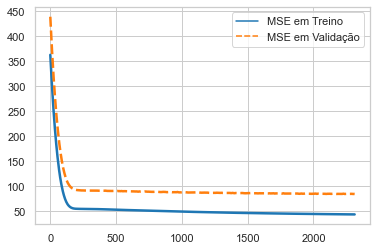

In [32]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [33]:
# Predictions with the trained model
previsoes = modelo.predict(x_teste).flatten()

In [34]:
# Print the forecasts
previsoes

array([20.861046, 18.337666, 23.920246, 21.284721, 20.524593, 20.624283,
       24.5433  , 21.889084, 21.023037, 20.823662, 25.920254, 23.434261,
       21.241108, 22.71775 , 23.259808, 21.590015, 27.11029 , 23.359497,
       29.658588, 19.907768, 20.38752 , 20.96696 , 19.160099, 20.861046,
       18.92334 , 23.521492, 22.867283, 14.144505, 17.122707, 35.633694,
       21.465405, 18.169441, 19.957615, 22.798748, 31.833054, 24.343925,
       21.789394, 28.175716, 25.820568, 32.518414, 27.733345, 30.867317,
       32.381344, 17.122707, 23.066658, 23.284729, 18.300285, 23.565105,
       37.683548, 35.776993, 18.094677, 35.14771 , 31.37199 , 25.982563,
       23.658562, 22.798748, 26.20063 , 27.988796, 24.761372, 24.368847,
       23.17881 , 19.0168  , 23.421803, 22.804977, 21.066654, 20.181911,
       21.203724, 22.156998, 21.6274  , 21.533943, 27.166367, 24.879753,
       10.667852, 13.857899, 17.03548 , 23.359497, 17.428005, 17.91399 ,
       23.396877, 21.477867, 20.18814 , 26.026176, 

## The End